In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [14]:
# alpha (x-axis)
alphaList = np.arange(-1, 2, 0.01)
alphaList

array([-1.0000000e+00, -9.9000000e-01, -9.8000000e-01, -9.7000000e-01,
       -9.6000000e-01, -9.5000000e-01, -9.4000000e-01, -9.3000000e-01,
       -9.2000000e-01, -9.1000000e-01, -9.0000000e-01, -8.9000000e-01,
       -8.8000000e-01, -8.7000000e-01, -8.6000000e-01, -8.5000000e-01,
       -8.4000000e-01, -8.3000000e-01, -8.2000000e-01, -8.1000000e-01,
       -8.0000000e-01, -7.9000000e-01, -7.8000000e-01, -7.7000000e-01,
       -7.6000000e-01, -7.5000000e-01, -7.4000000e-01, -7.3000000e-01,
       -7.2000000e-01, -7.1000000e-01, -7.0000000e-01, -6.9000000e-01,
       -6.8000000e-01, -6.7000000e-01, -6.6000000e-01, -6.5000000e-01,
       -6.4000000e-01, -6.3000000e-01, -6.2000000e-01, -6.1000000e-01,
       -6.0000000e-01, -5.9000000e-01, -5.8000000e-01, -5.7000000e-01,
       -5.6000000e-01, -5.5000000e-01, -5.4000000e-01, -5.3000000e-01,
       -5.2000000e-01, -5.1000000e-01, -5.0000000e-01, -4.9000000e-01,
       -4.8000000e-01, -4.7000000e-01, -4.6000000e-01, -4.5000000e-01,
      

In [4]:
result = {
    '50':{
        'train_loss':0.0539,
        'train_acc':0.9602,
        'test_loss':0.1804,
        'test_acc':0.9460,
    },
    '6000':{
        'train_loss':0.0562,
        'train_acc':0.9836,
        'test_loss':0.0619,
        'test_acc':0.9790,
    }
}

########################
### Batch size : 6000 
# train_loss 0.0562
# train_acc 0.9836
# test_loss 0.0619
# test_acc 0.9790

### Batch size : 50 
# train_loss 0.0539
# train_acc 0.9602
# test_loss 0.1804
# test_acc 0.9460


In [15]:
# train_acc
train_acc = [(1-alpha)*result['50']['train_acc'] + alpha*result['6000']['train_acc'] 
             for alpha in alphaList]
train_acc = np.array(train_acc)*100 # update to percent scale

# train_loss
train_loss = [(1-alpha)*result['50']['train_loss'] + alpha*result['6000']['train_loss'] 
             for alpha in alphaList]
train_loss = np.array(train_loss)

# train_acc
test_acc = [(1-alpha)*result['50']['test_acc'] + alpha*result['6000']['test_acc'] 
             for alpha in alphaList]
test_acc = np.array(test_acc)*100 # update to percent scale

# train_loss
test_loss = [(1-alpha)*result['50']['test_loss'] + alpha*result['6000']['test_loss'] 
             for alpha in alphaList]
test_loss = np.array(test_loss)

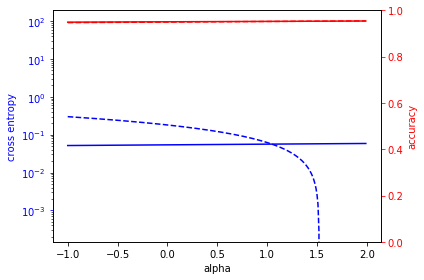

In [21]:
fig, ax1 = plt.subplots()

# first dataset
ax1.plot(alphaList, train_loss, 'b-')
ax1.plot(alphaList, test_loss, 'b--')
ax1.plot(alphaList, train_acc,'r-')
ax1.plot(alphaList, test_acc,'r--')


ax1.set_xlabel('alpha')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('cross entropy', color='b')
ax1.set_yscale("log", nonposy=)
ax1.tick_params('y', colors='b') # axis param

# second dataset
ax2 = ax1.twinx()
# ax2.plot(batch, accuracy, 'r-')
ax2.set_ylabel('accuracy', color='r')
ax2.tick_params('y', colors='r') # axis param

# test_acc_patch = mpatches.Patch(color='black', label='test acc')
# train_acc_patch = mpatches.Patch(color='black', label='train acc')
# plt.legend(handles=[test_acc_patch, train_acc_patch])

fig.tight_layout()
plt.show()
# fig.savefig('./acc-sensitivity.png')